# Eletricidade - Clusterização :

#### Marcio Carvalho

### Problema de negócio: 

##### Aneel - órgão regulador. Sabemos o consumo por estado, não conhecemos o perfil do cliente. Precisamos agrupar o perfil do cliente de acordo com o nível de consumo independe de onde eles moram, pois, queremos fazer uma atividade de marketing direcionada. Precisamos construir uma Máquina Preditiva (MP), a partir do consumo de energia de cliente. Agrupe os consumidores por similaridades, afim de compreender o comportamento dos clientes e sua relação com o consumo de energia (Simulação como se cada linha representasse vários clientes).

### Coleta:

https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

### Dataset:
         
##### Este arquivo contém 2.075.259 medições coletadas em uma casa localizada em Sceaux (7km de Paris, França) entre dezembro de 2006 e novembro de 2010 (47 meses).

### Features:

1.data: Data no formato dd/mm/aaaa

2.time: hora no formato hh:mm:ss

3.global_active_power: potência ativa média global doméstica por minuto (em quilowatts)

4.global_reactive_power: potência reativa média global doméstica por minuto (em quilowatts)

5.tensão: tensão média por minuto (em volts)

6.global_intensity: intensidade de corrente média global por minuto doméstica (em amperes)

7.sub_metering_1: sub medição de energia nº 1 (em watt-hora de energia ativa). Corresponde à cozinha, contendo maioritariamente uma máquina de lavar louça, um forno e um micro-ondas (as placas não são eléctricas mas sim a gás).

8.sub_metering_2: sub medição de energia nº 2 (em watt-hora de energia ativa). Corresponde à lavandaria, contendo máquina de lavar roupa, máquina de secar roupa, frigorífico e luz.

9.sub_metering_3: sub medição de energia nº 3 (em watt-hora de energia ativa). Corresponde a um esquentador eléctrico e a um ar condicionado.


     

   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

C:\Users\carva\AppData\Local\Temp\ipykernel_16260\1311086195.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [35]:
# arquivos em diretórios diferentes, utilizado caminho relativo
df = pd.read_table('../data/household_power_consumption.txt', sep=";")
# renomear colunas com títulos mais intuitivos e traduzidos
df.columns = ['Data','Tempo','Potencia_ativa_total','Potencia_reativa_total','Tensao','Corrente_Total','Sub_area_cozinha','Sub_area_lavanderia','Sub_area_Aq_Ar']
# configurar o pandas para não dgerar saídas por notação científica e sim float com duas casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)
# configurar o pandas para mostrar todas as colunas sem corte
pd.set_option('display.max_columns',None)
df.head()

,Data,Tempo,Potencia_ativa_total,Potencia_reativa_total,Tensao,Corrente_Total,Sub_area_cozinha,Sub_area_lavanderia,Sub_area_Aq_Ar
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.00


In [4]:
df_cop = df.copy()

In [5]:
df_cop.shape

(2075259, 9)

In [6]:
# Verifica se há linhas totalmente nulas e exclui do dataframe
df_cop.dropna(axis=0, how='all')
df_cop.shape 

(2075259, 9)

In [7]:
df_cop.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Data                    object 
 1   Tempo                   object 
 2   Potencia_ativa_total    object 
 3   Potencia_reativa_total  object 
 4   Tensao                  object 
 5   Corrente_Total          object 
 6   Sub_area_cozinha        object 
 7   Sub_area_lavanderia     object 
 8   Sub_area_Aq_Ar          float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [9]:
df_cop.isnull().sum()

Data                          0
Tempo                         0
Potencia_ativa_total          0
Potencia_reativa_total        0
Tensao                        0
Corrente_Total                0
Sub_area_cozinha              0
Sub_area_lavanderia           0
Sub_area_Aq_Ar            25979
dtype: int64

In [10]:
# Verificar se cada célula contém '?', inicialmente foi gerado erro na tentativa de converter objeto em número. explicação do erro apresentou a string "?"
erro = df_cop.applymap(lambda x: '?' in str(x))
# Iterar sobre as colunas com '?' e substituir '?' por NaN e converter para float
for coluna in erro.columns:
    if erro[coluna].any():
        df_cop[coluna] = pd.to_numeric(df_cop[coluna], errors='coerce')
        print(f'A coluna {coluna} contém pelo menos um ponto de interrogação.')
df_cop.info()

A coluna Potencia_ativa_total contém pelo menos um ponto de interrogação.
A coluna Potencia_reativa_total contém pelo menos um ponto de interrogação.
A coluna Tensao contém pelo menos um ponto de interrogação.
A coluna Corrente_Total contém pelo menos um ponto de interrogação.
A coluna Sub_area_cozinha contém pelo menos um ponto de interrogação.
A coluna Sub_area_lavanderia contém pelo menos um ponto de interrogação.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Data                    object 
 1   Tempo                   object 
 2   Potencia_ativa_total    float64
 3   Potencia_reativa_total  float64
 4   Tensao                  float64
 5   Corrente_Total          float64
 6   Sub_area_cozinha        float64
 7   Sub_area_lavanderia     float64
 8   Sub_area_Aq_Ar          float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [11]:
# Lista de colunas e seus respectivos formatos de data/tempo
colunas_formatos = {'Data': '%d/%m/%Y', 'Tempo': '%H:%M:%S'}
# Iterar sobre as colunas e formatos
for coluna, formato in colunas_formatos.items():
    df_cop[coluna] = pd.to_datetime(df_cop[coluna], format=formato)
df_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Data                    datetime64[ns]
 1   Tempo                   datetime64[ns]
 2   Potencia_ativa_total    float64       
 3   Potencia_reativa_total  float64       
 4   Tensao                  float64       
 5   Corrente_Total          float64       
 6   Sub_area_cozinha        float64       
 7   Sub_area_lavanderia     float64       
 8   Sub_area_Aq_Ar          float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 142.5 MB


In [12]:
df_cop.isnull().sum()

Data                          0
Tempo                         0
Potencia_ativa_total      25979
Potencia_reativa_total    25979
Tensao                    25979
Corrente_Total            25979
Sub_area_cozinha          25979
Sub_area_lavanderia       25979
Sub_area_Aq_Ar            25979
dtype: int64

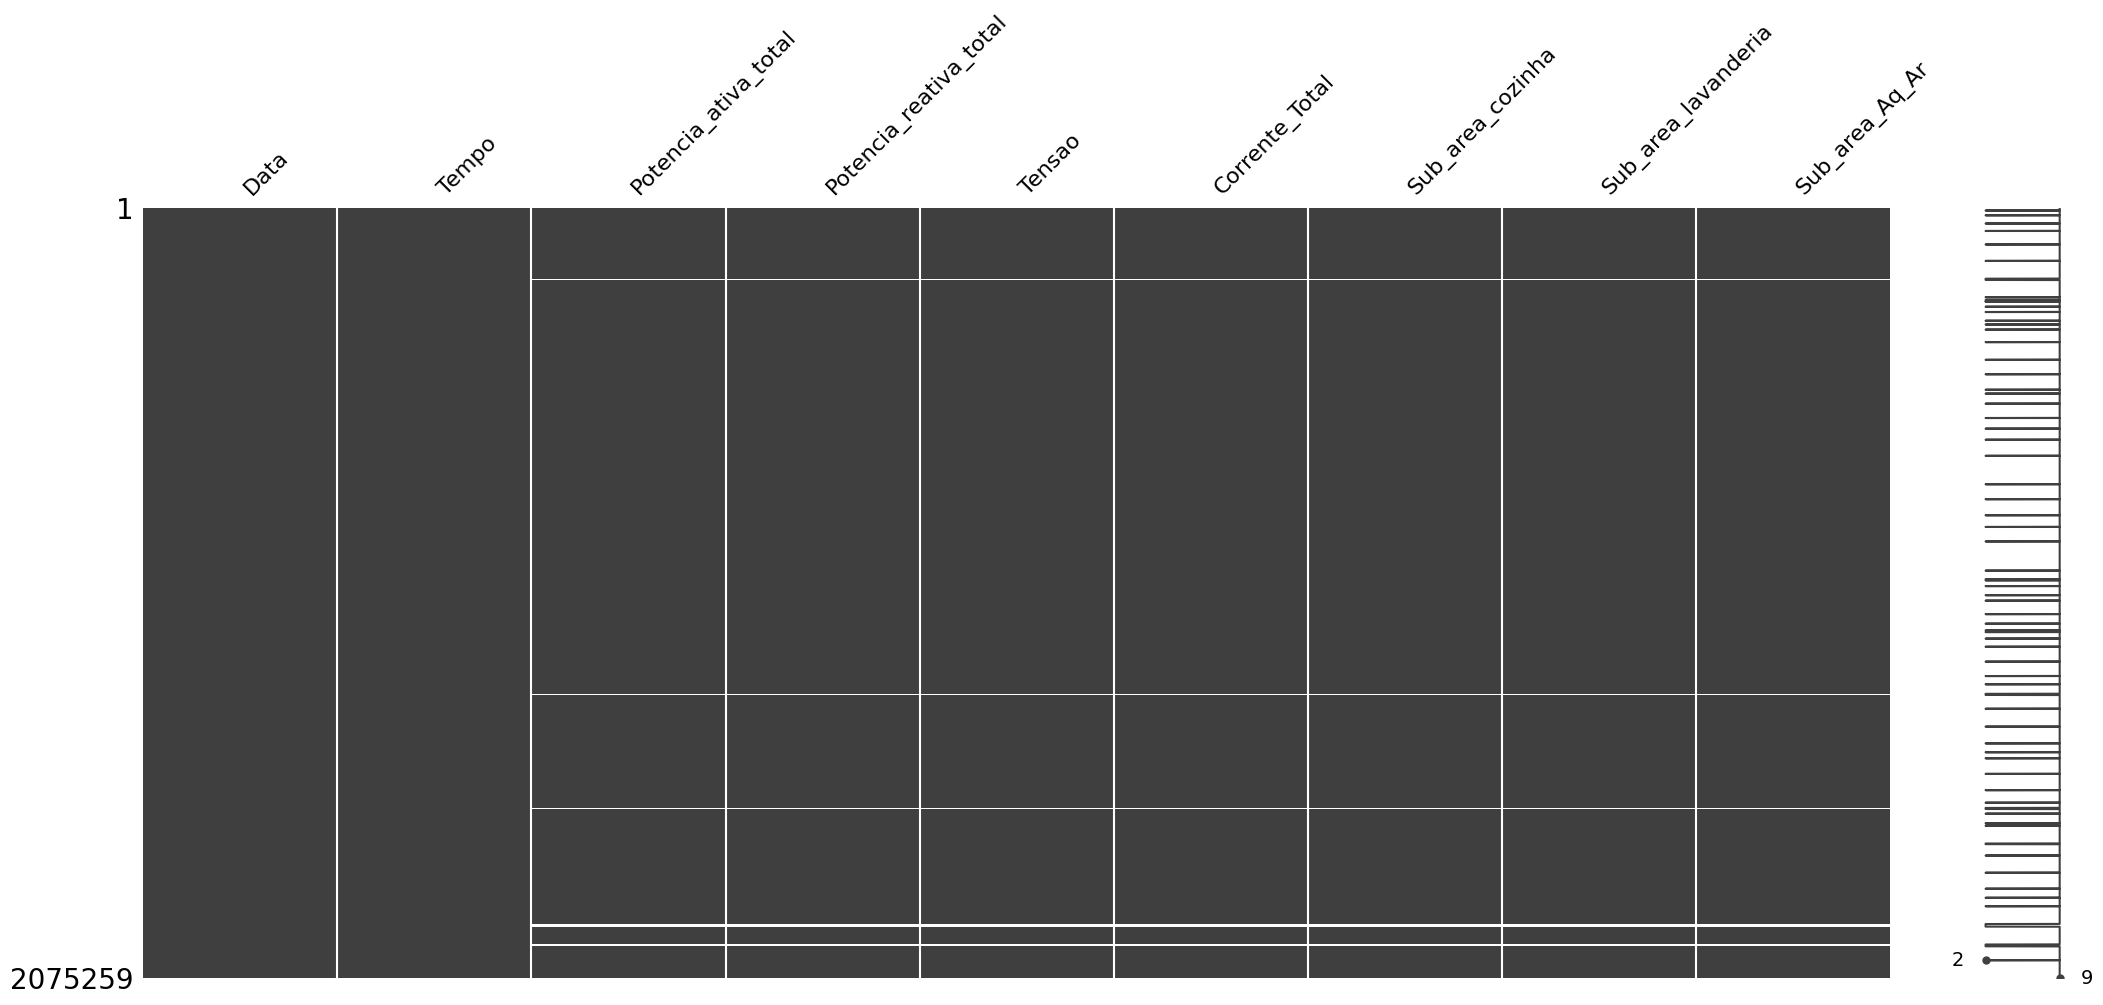

In [13]:
ax = msno.matrix(df_cop)

In [14]:
# Valores ausentes foram apagados devido o gráfico de matriz mostrar que não haveria salvamento de informação nenhuma, pois, todos os valores na linha de cada coluna também estavam vazios, salvo data e tempo
df_cop.dropna(how='any' , inplace=True, axis=0)
df_cop.isnull().sum()

Data                      0
Tempo                     0
Potencia_ativa_total      0
Potencia_reativa_total    0
Tensao                    0
Corrente_Total            0
Sub_area_cozinha          0
Sub_area_lavanderia       0
Sub_area_Aq_Ar            0
dtype: int64

In [15]:
df_cop.head(3)

,Data,Tempo,Potencia_ativa_total,Potencia_reativa_total,Tensao,Corrente_Total,Sub_area_cozinha,Sub_area_lavanderia,Sub_area_Aq_Ar
0,2006-12-16,1900-01-01 17:24:00,4.22,0.42,234.84,18.40,0.00,1.00,17.00
1,2006-12-16,1900-01-01 17:25:00,5.36,0.44,233.63,23.00,0.00,1.00,16.00
2,2006-12-16,1900-01-01 17:26:00,5.37,0.50,233.29,23.00,0.00,2.00,17.00


In [16]:
df_cop1 = df_cop.copy()

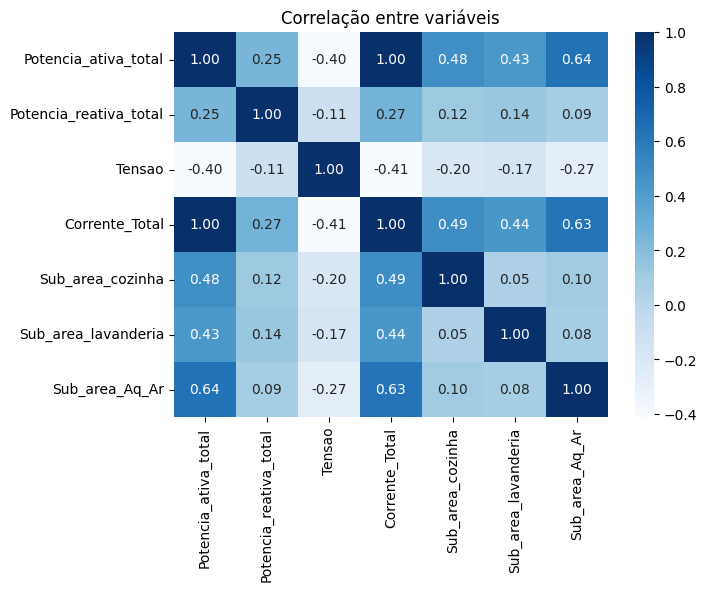

In [17]:
df_numerico = df_cop1.select_dtypes(include='number')
plt.figure(figsize=(7, 5))
sns.heatmap(df_numerico.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.show()


In [18]:
col_ind = ['Data','Tempo','Corrente_Total']
df_cop1.insert(2, 'Ano', df_cop1['Data'].dt.year)
df_cop1.insert(3, 'Trimestre', df_cop1['Data'].dt.quarter)
df_cop1.insert(4, 'Periodo', df_cop1['Tempo'].apply(lambda x: 'Dia' if 6 <= x.hour < 18 else ('Noite' if 18 <= x.hour < 24 else 'Madrugada')))
# Colunas Data e tempo retiradas para não gerar conflito nas estatísticas e Corrente total devido a alta correlação com potência ativa total
df_cop_temp = df_cop1.drop(columns=col_ind)
df_cop_temp.head(4)

,Ano,Trimestre,Periodo,Potencia_ativa_total,Potencia_reativa_total,Tensao,Sub_area_cozinha,Sub_area_lavanderia,Sub_area_Aq_Ar
0,2006,4,Dia,4.22,0.42,234.84,0.00,1.00,17.00
1,2006,4,Dia,5.36,0.44,233.63,0.00,1.00,16.00
2,2006,4,Dia,5.37,0.50,233.29,0.00,2.00,17.00
3,2006,4,Dia,5.39,0.50,233.74,0.00,1.00,17.00


In [19]:
colunas = ['Potencia_ativa_total','Potencia_reativa_total','Tensao','Sub_area_cozinha','Sub_area_lavanderia','Sub_area_Aq_Ar']
estat_trimestre = df_cop_temp.groupby('Ano')[colunas].agg(['mean', 'std', 'min', 'max'])
estat_trimestre

Potencia_ativa_total                 Potencia_reativa_total            \
                     mean  std  min   max                   mean  std  min   
Ano                                                                          
2006                 1.90 1.42 0.19  9.13                   0.13 0.12 0.00   
2007                 1.12 1.16 0.08 10.67                   0.12 0.11 0.00   
2008                 1.07 1.07 0.08 10.35                   0.12 0.11 0.00   
2009                 1.08 1.01 0.12 11.12                   0.13 0.12 0.00   
2010                 1.06 0.93 0.14  9.72                   0.13 0.11 0.00   

          Tensao                    Sub_area_cozinha                  \
      max   mean  std    min    max             mean  std  min   max   
Ano                                                                    
2006 0.80 241.44 3.92 228.20 251.70             1.25 6.65 0.00 77.00   
2007 1.15 239.38 3.56 223.49 252.14             1.23 6.46 0.00 78.00   
2008 1.39 240.63 2.87 224.58 250.92             1.11 6.14 0.00 80.00   
2009 1.24 241.89 2.97 223.20 254.15             1.14 6.27 0.00 82.00   
2010 1.12 241.52 2.85 225.32 253.53             0.99 5.64 0.00 88.00   

     Sub_area_lavanderia                 Sub_area_Aq_Ar                  
                    mean  std  min   max           mean  std  min   max  
Ano                                                                      
2006                2.21 8.45 0.00 74.00           7.41 8.66 0.00 20.00  
2007                1.64 6.73 0.00 78.00           5.79 8.19 0.00 20.00  
2008                1.26 5.80 0.00 76.00           6.03 8.23 0.00 31.00  
2009                1.14 5.29 0.00 77.00           6.82 8.57 0.00 31.00  
2010                1.10 5.09 0.00 80.00           7.24 8.70 0.00 31.00

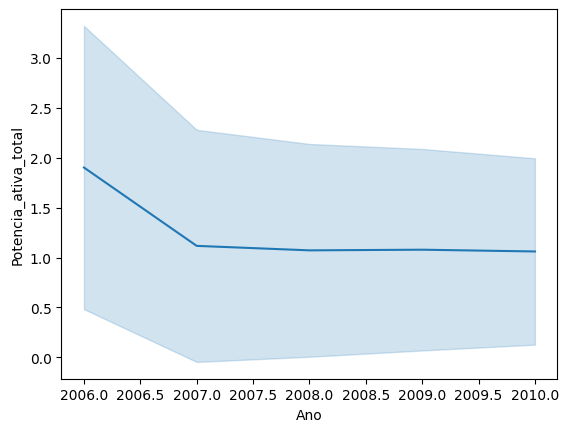

In [20]:
sns.lineplot(x='Ano', y='Potencia_ativa_total', data=df_cop_temp,ci='sd')
plt.show()

In [21]:
colunas = ['Potencia_ativa_total','Potencia_reativa_total','Tensao','Sub_area_cozinha','Sub_area_lavanderia','Sub_area_Aq_Ar']
estat_trimestre = df_cop_temp.groupby('Trimestre')[colunas].agg(['mean', 'std', 'min', 'max'])
estat_trimestre

Potencia_ativa_total                 Potencia_reativa_total       \
                          mean  std  min   max                   mean  std   
Trimestre                                                                    
1                         1.33 1.17 0.20 11.12                   0.11 0.11   
2                         1.00 0.94 0.08  9.48                   0.13 0.12   
3                         0.75 0.82 0.08  8.69                   0.14 0.12   
4                         1.30 1.15 0.12 10.35                   0.11 0.11   

                    Tensao                    Sub_area_cozinha            \
           min  max   mean  std    min    max             mean  std  min   
Trimestre                                                                  
1         0.00 1.10 241.73 3.36 223.49 253.94             1.27 6.58 0.00   
2         0.00 1.39 239.97 3.15 223.20 250.18             1.21 6.37 0.00   
3         0.00 1.22 240.21 2.63 224.44 250.92             0.79 5.13 0.00   
4         0.00 1.24 241.48 3.39 225.32 254.15             1.22 6.42 0.00   

                Sub_area_lavanderia                 Sub_area_Aq_Ar            \
            max                mean  std  min   max           mean  std  min   
Trimestre                                                                      
1         88.00                1.54 6.76 0.00 80.00           7.43 8.77 0.00   
2         87.00                1.24 5.41 0.00 76.00           6.52 8.46 0.00   
3         79.00                0.99 4.42 0.00 76.00           4.81 7.56 0.00   
4         81.00                1.43 6.42 0.00 77.00           7.09 8.68 0.00   

                 
            max  
Trimestre        
1         30.00  
2         31.00  
3         31.00  
4         31.00

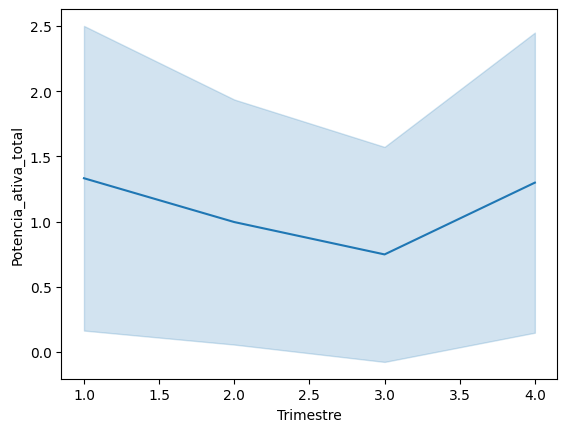

In [22]:
sns.lineplot(x='Trimestre', y='Potencia_ativa_total', data=df_cop_temp,ci='sd')
plt.show()

In [23]:
colunas = ['Potencia_ativa_total','Potencia_reativa_total','Tensao','Sub_area_cozinha','Sub_area_lavanderia','Sub_area_Aq_Ar']
estat_periodo = df_cop_temp.groupby('Periodo')[colunas].agg(['mean', 'std', 'min', 'max'])
estat_periodo


Potencia_ativa_total                 Potencia_reativa_total       \
                          mean  std  min   max                   mean  std   
Periodo                                                                      
Dia                       1.17 1.01 0.08 11.12                   0.12 0.11   
Madrugada                 0.50 0.53 0.08 10.29                   0.10 0.09   
Noite                     1.53 1.26 0.08 10.67                   0.14 0.12   

                    Tensao                    Sub_area_cozinha            \
           min  max   mean  std    min    max             mean  std  min   
Periodo                                                                    
Dia       0.00 1.24 240.50 3.14 223.20 254.15             1.11 6.12 0.00   
Madrugada 0.00 0.94 242.32 2.87 228.48 253.94             0.15 2.27 0.00   
Noite     0.00 1.39 240.03 3.32 223.49 253.36             2.12 8.33 0.00   

                Sub_area_lavanderia                 Sub_area_Aq_Ar            \
            max                mean  std  min   max           mean  std  min   
Periodo                                                                        
Dia       88.00                1.61 6.78 0.00 80.00           8.64 8.93 0.00   
Madrugada 45.00                0.38 1.32 0.00 76.00           2.17 5.27 0.00   
Noite     87.00                1.60 6.39 0.00 75.00           6.38 8.35 0.00   

                 
            max  
Periodo          
Dia       31.00  
Madrugada 31.00  
Noite     31.00

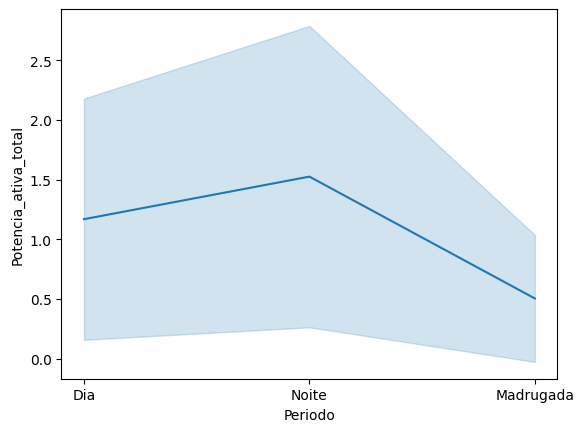

In [24]:
sns.lineplot(x='Periodo', y='Potencia_ativa_total', data=df_cop_temp, ci='sd')
plt.show()

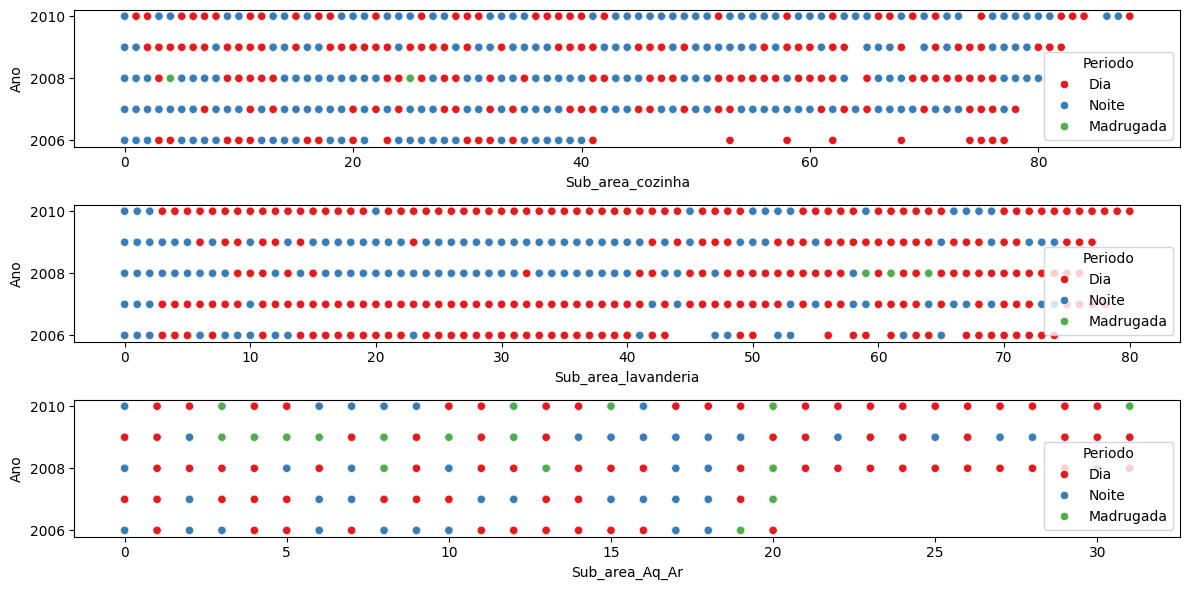

In [25]:
coluna = ['Sub_area_cozinha','Sub_area_lavanderia','Sub_area_Aq_Ar']
#df_cop_temp['periodo']
fig, axs = plt.subplots(3, 1, figsize=(12, 6))
axs = axs.flatten()
for i,var in enumerate(coluna):
    ax = sns.scatterplot(x=var, y='Ano', hue='Periodo', palette='Set1', data=df_cop1, ax=axs[i])
    #ax.get_figure().savefig("Dispersão de variaveis.png")
fig.tight_layout()

In [26]:
df_cop1.nunique()

Data                      1433
Tempo                     1440
Ano                          5
Trimestre                    4
Periodo                      3
Potencia_ativa_total      4186
Potencia_reativa_total     532
Tensao                    2837
Corrente_Total             221
Sub_area_cozinha            88
Sub_area_lavanderia         81
Sub_area_Aq_Ar              32
dtype: int64

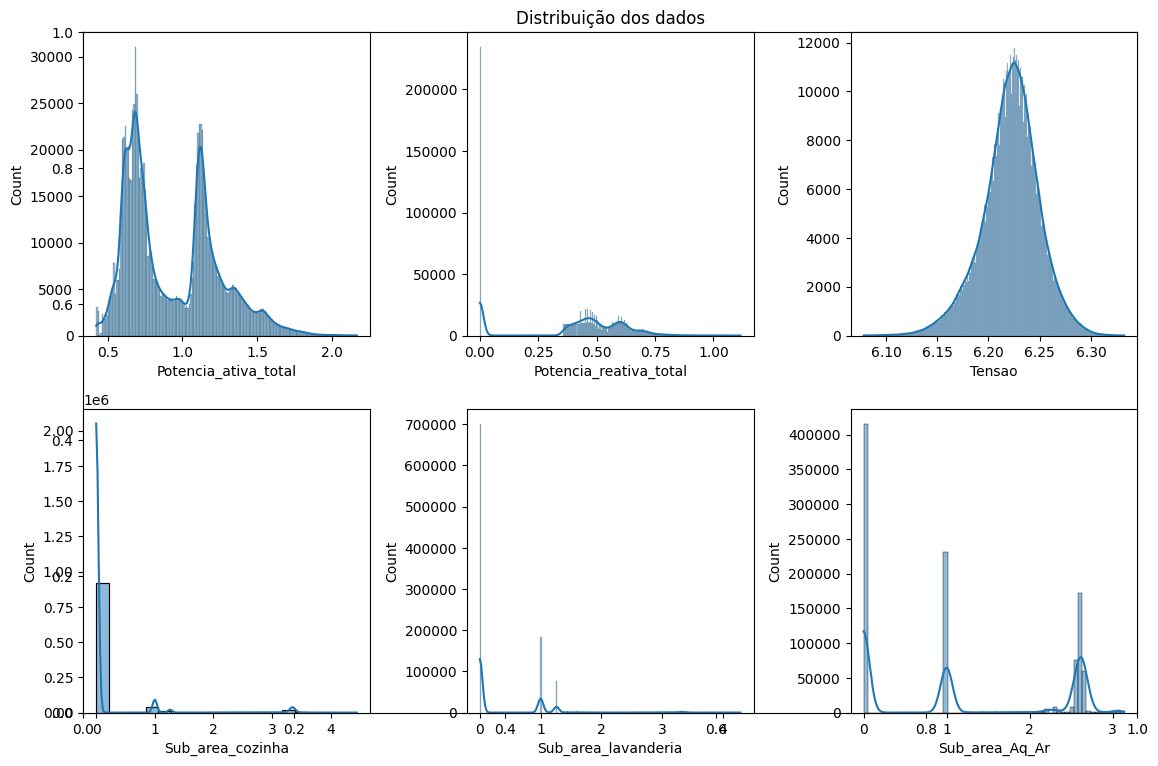

In [27]:
df_sample = df_numerico.sample(n=1000000)
coluna = ['Potencia_ativa_total','Potencia_reativa_total','Tensao','Sub_area_cozinha','Sub_area_lavanderia','Sub_area_Aq_Ar']
fig = plt.figure(figsize=(12,8))
# Aplicar a transformação de escala de raiz cúbica aos dados para melhor visualização 
plt.title('Distribuição dos dados')
df_cbrt = df_sample.apply(lambda x: x**(1/3))
for i,var in enumerate(coluna):
    
    fsub = plt.subplot(2, 3,i+1)
    ax = sns.histplot(x=var, data=df_cbrt, ax=fsub, kde=True)
    #ax.get_figure().savefig("boxplot de variaveis.png")
    
fig.tight_layout()

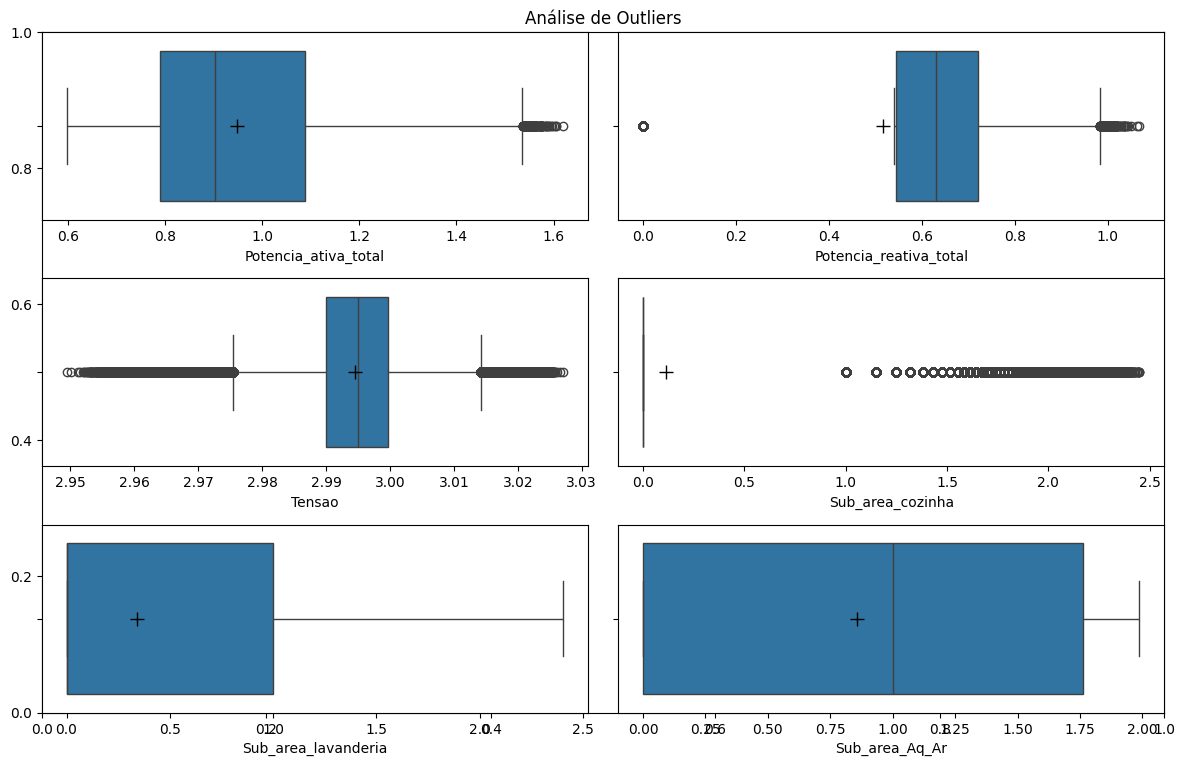

In [28]:
coluna = ['Potencia_ativa_total','Potencia_reativa_total','Tensao','Sub_area_cozinha','Sub_area_lavanderia','Sub_area_Aq_Ar']
fig = plt.figure(figsize=(12,8))
plt.title('Análise de Outliers')
df_cbrt = df_numerico.apply(lambda x: x**(1/5))
for i,var in enumerate(coluna):
    fsub = plt.subplot(3, 2, i+1)
    ax = sns.boxplot(x=var, data=df_cbrt, ax=fsub,showmeans=True,meanprops={"marker": "+", 
                       "markeredgecolor": "black", 
                       "markersize": "10"})
    #ax.get_figure().savefig("boxplot de variaveis.png")
fig.tight_layout()

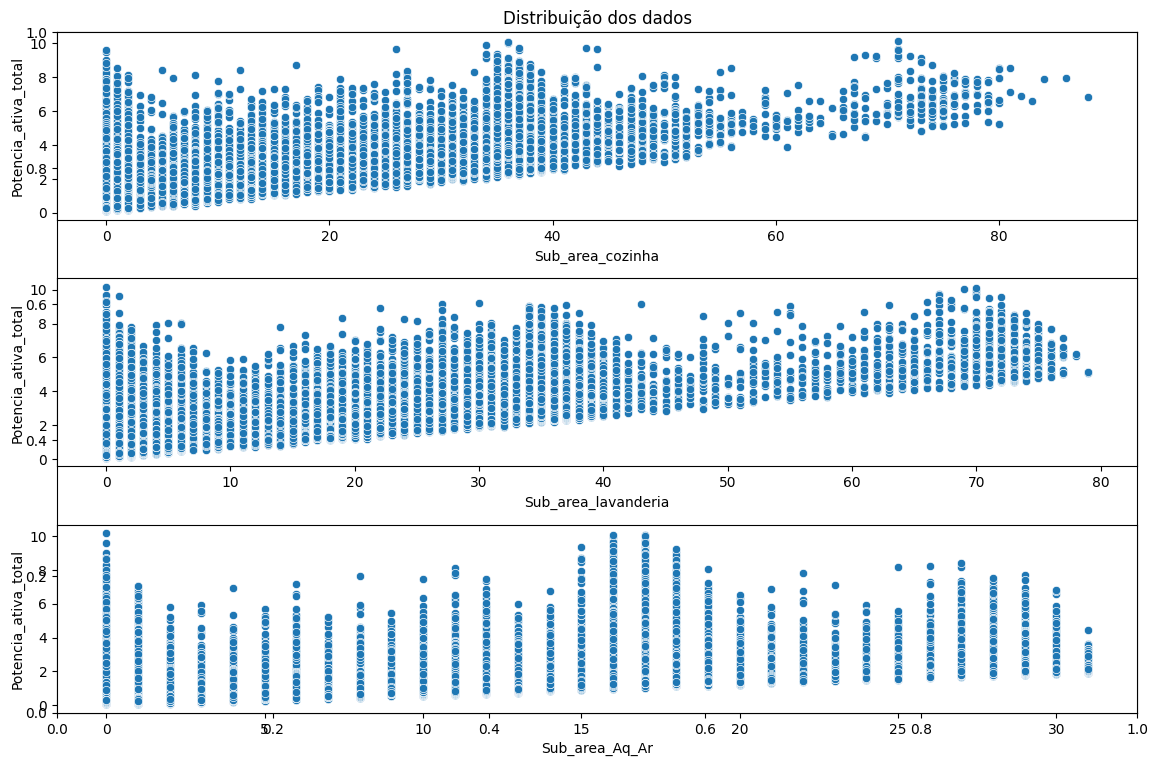

In [34]:
coluna = ['Sub_area_cozinha','Sub_area_lavanderia','Sub_area_Aq_Ar']
fig = plt.figure(figsize=(12,8))
plt.title('Distribuição dos dados')
for i,var in enumerate(coluna):
    fsub = plt.subplot(3, 1, i+1)
    ax = sns.scatterplot(x=var, y='Potencia_ativa_total', data=df_sample)
    #ax.get_figure().savefig("Dispersão dos dados.png")
fig.tight_layout()

In [30]:
df_cop1.to_csv('estudo_de_consumo.csv', index=False,encoding="utf-8")